In [ ]:
!pip install yfinance
!pip install matplotlib
!pip install seaborn
!pip install pandas
!pip install statsmodels
!pip install sklearn

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
from mpl_toolkits import mplot3d

%matplotlib inline

RND = 2020

In [ ]:
# import data

"""
GC=F - gold futures
GLD - SPDR GLD - gold investment fund
GOLD - Barrick Gold Corporation (mining)

DX-Y.NYB?P=DX-Y.NYB - usd currency index
^GSPC - S&p500
^DJI - dow jones
^IXIC - NASDAQ Composite
^GSPTSE - S&P/TSX Composite index
"""
start = '2000-03' #this is around where gold futures data starts
end_dt = '2020-07-17'

# gold futures
gcf = yf.Ticker('GC=F').history(period="max").loc[start:end_dt]

# group all
tickers = ['GC=F',
           'GLD',
           'GOLD',
           'DX-Y.NYB?P=DX-Y.NYB',
           '^GSPC',
           '^DJI',
           '^IXIC',
           '^GSPTSE']

#gather 'close' values for each     
res = []     
for t in tickers:
    temp = yf.Ticker(t).history(period="max")['Close'].loc[start:end_dt]
    temp.rename(t, inplace = True)
    res.append(temp)

all_close = pd.concat(res, axis = 1)

In [ ]:
gcf.head()
gcf.tail()
all_close.head()
all_close.tail()

#some NaN because they are not all sampled the same

,GC=F,GLD,GOLD,DX-Y.NYB?P=DX-Y.NYB,^GSPC,^DJI,^IXIC,^GSPTSE
Date,,,,,,,,
2020-07-13,1801.9,169.40,26.13,96.56,3155.22,26085.80,10390.84,15639.4
2020-07-14,1812.9,170.19,27.05,96.26,3197.52,26642.59,10488.58,15908.5
2020-07-15,1815.0,170.34,27.09,96.08,3226.56,26870.10,10550.49,16063.3
2020-07-16,1797.8,168.73,26.69,96.35,3215.57,26734.71,10473.83,16024.5
2020-07-17,1812.1,170.12,27.34,95.94,3224.73,26671.95,10503.19,16123.5


In [ ]:
gcf.isna().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f47238fa358>,
      dtype=object)

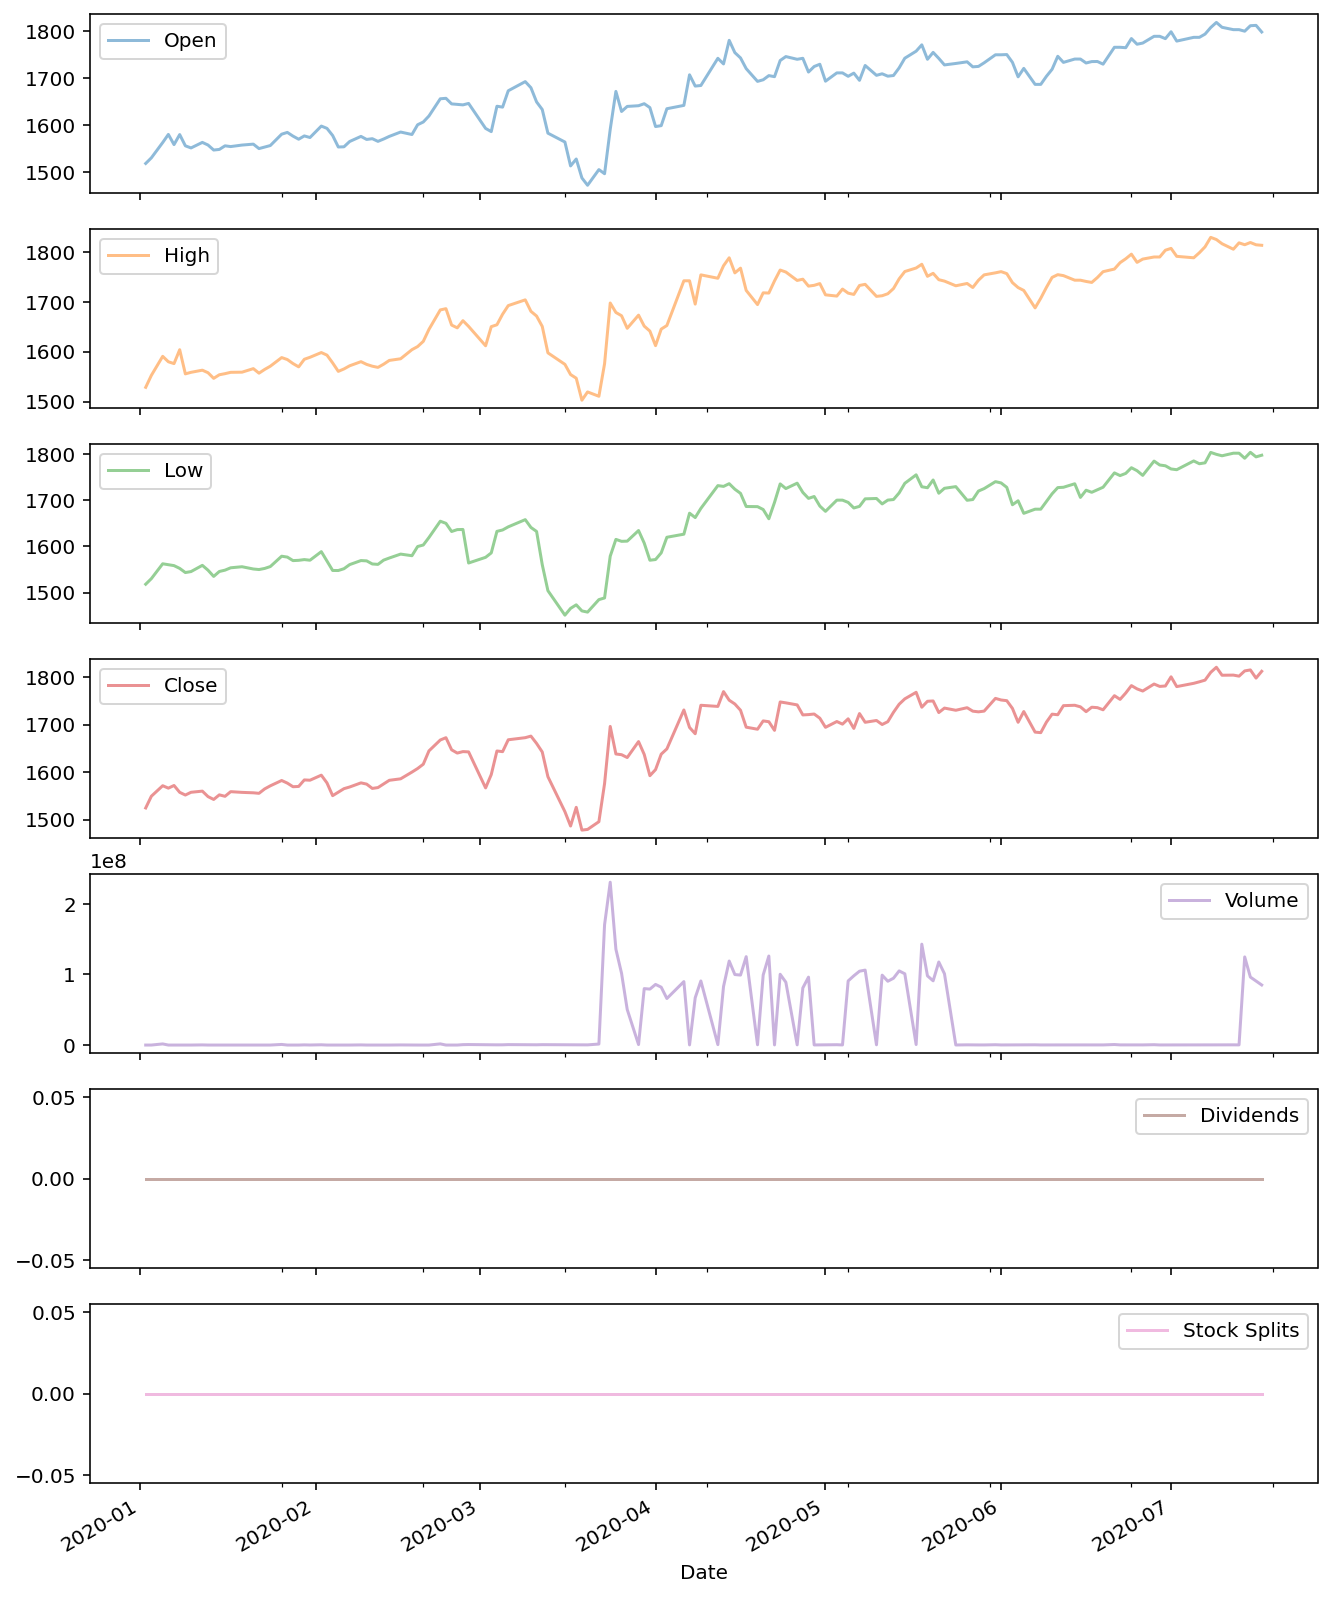

In [ ]:
gcf.loc['2020':].plot( alpha=0.5, figsize=(11, 15), subplots=True)

In [ ]:
# greatest gap between data points
gcf.loc['2020':].index.to_series().diff().max()

Timedelta('3 days 00:00:00')

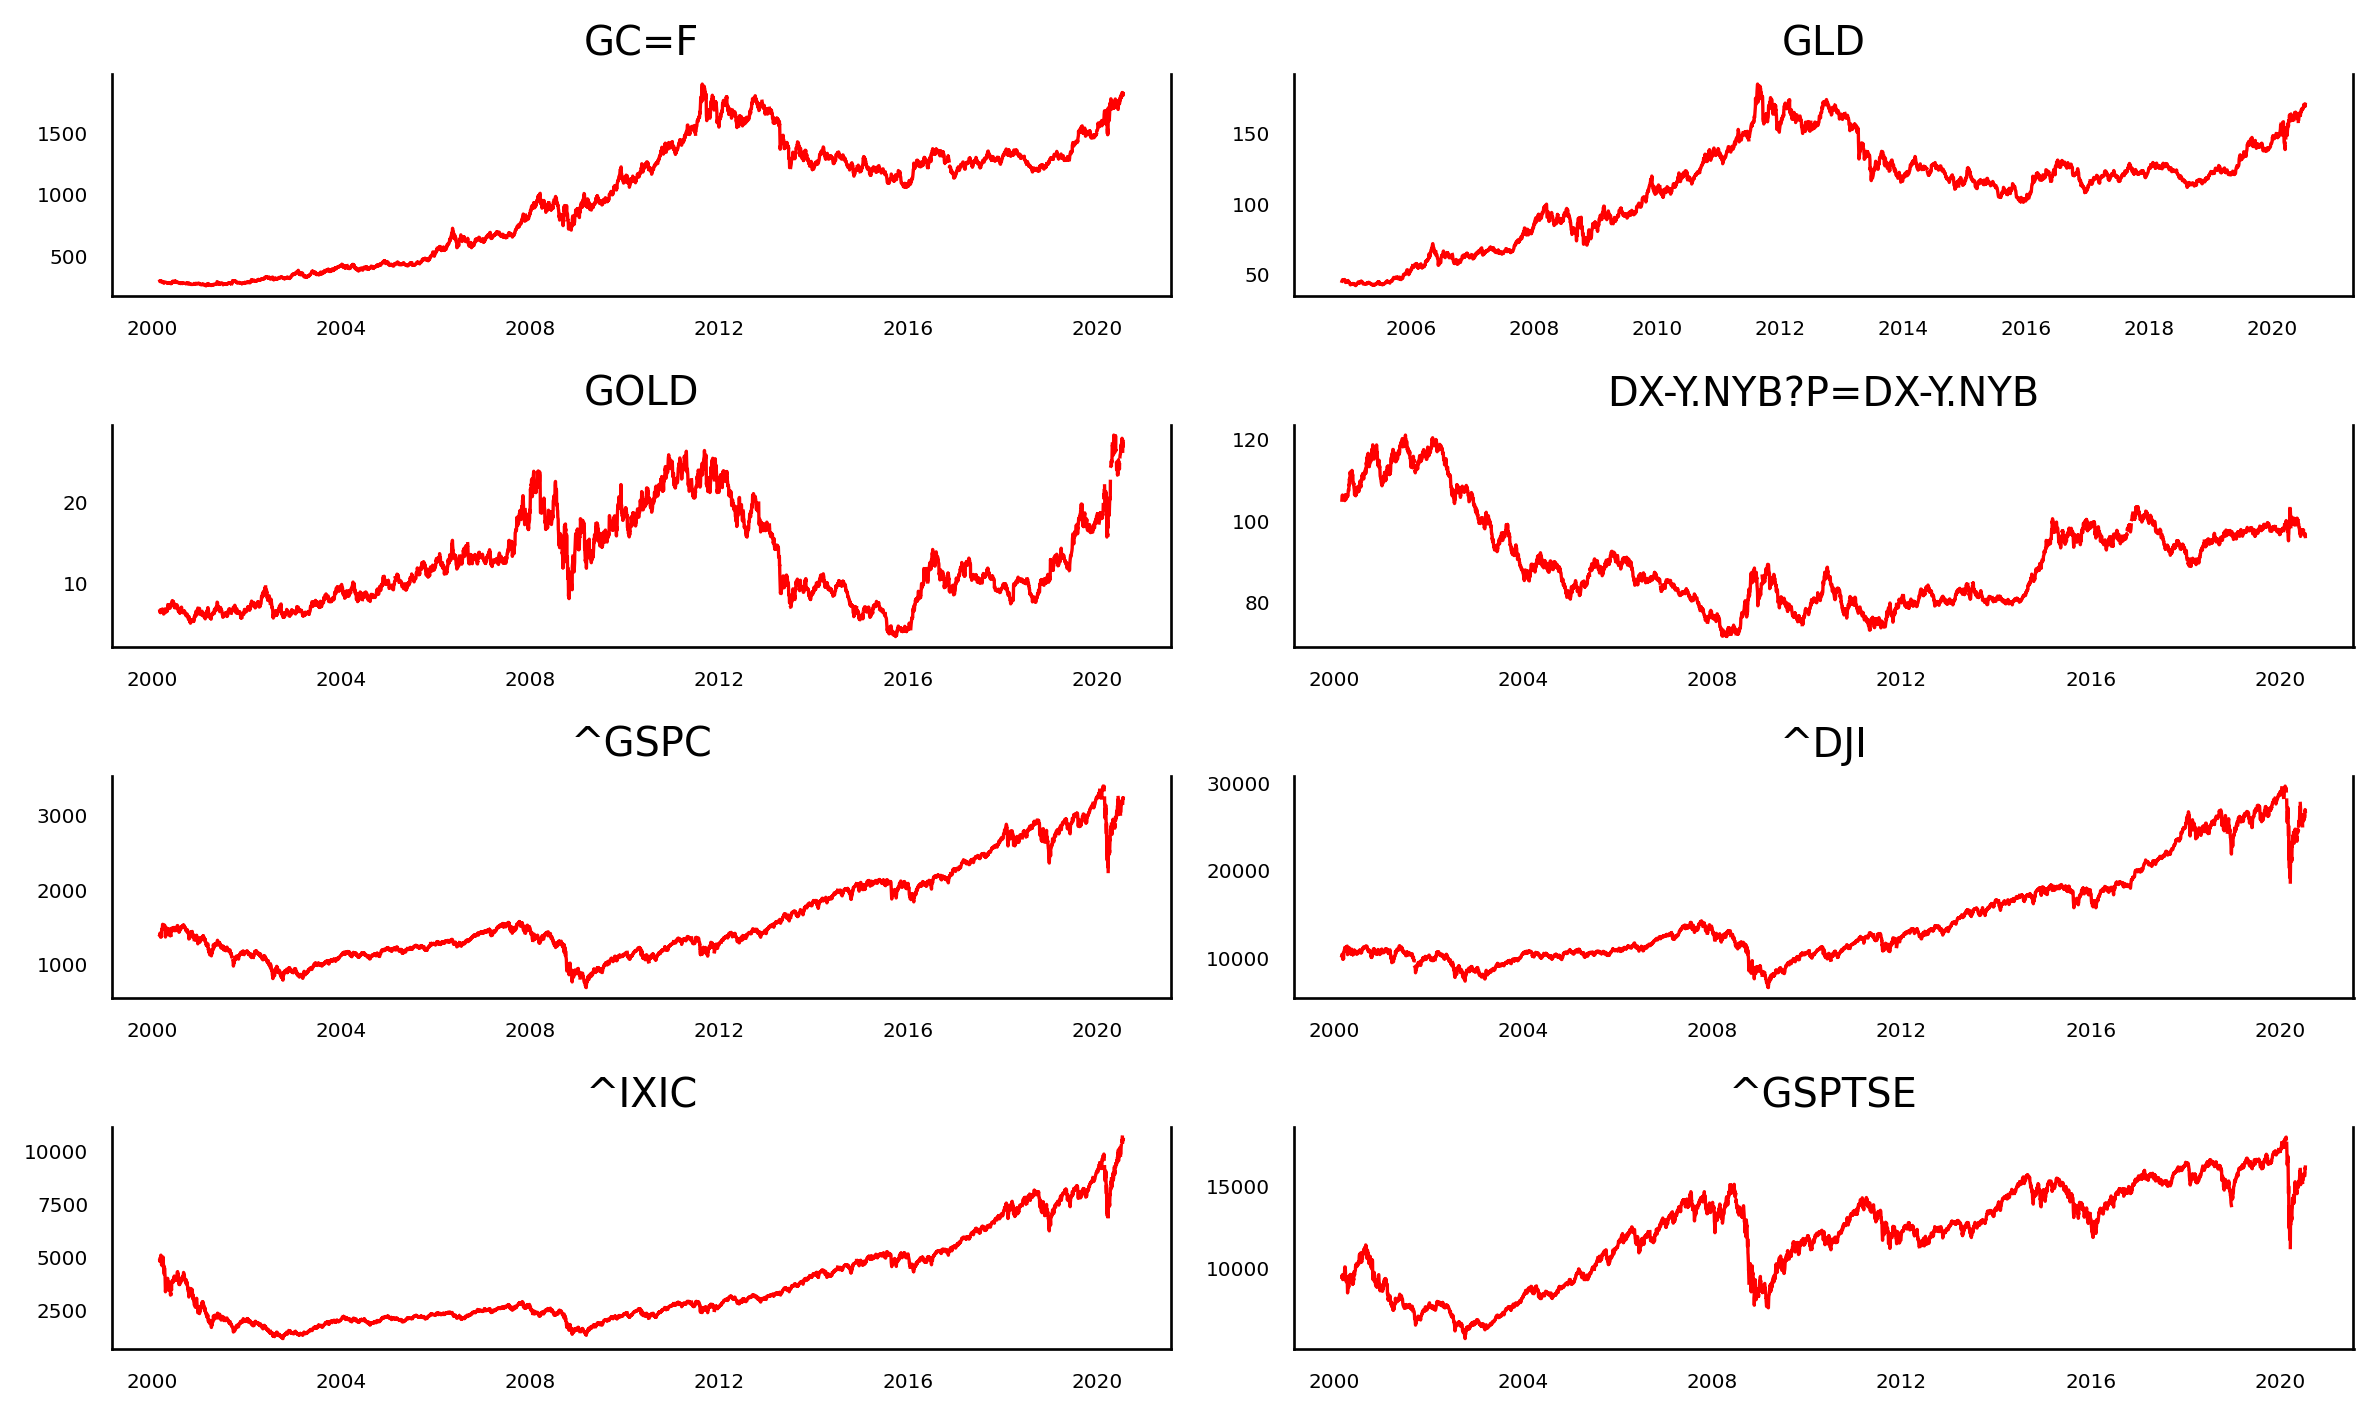

In [ ]:
# plot all 
df = all_close
fig, axes = plt.subplots(nrows=4, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

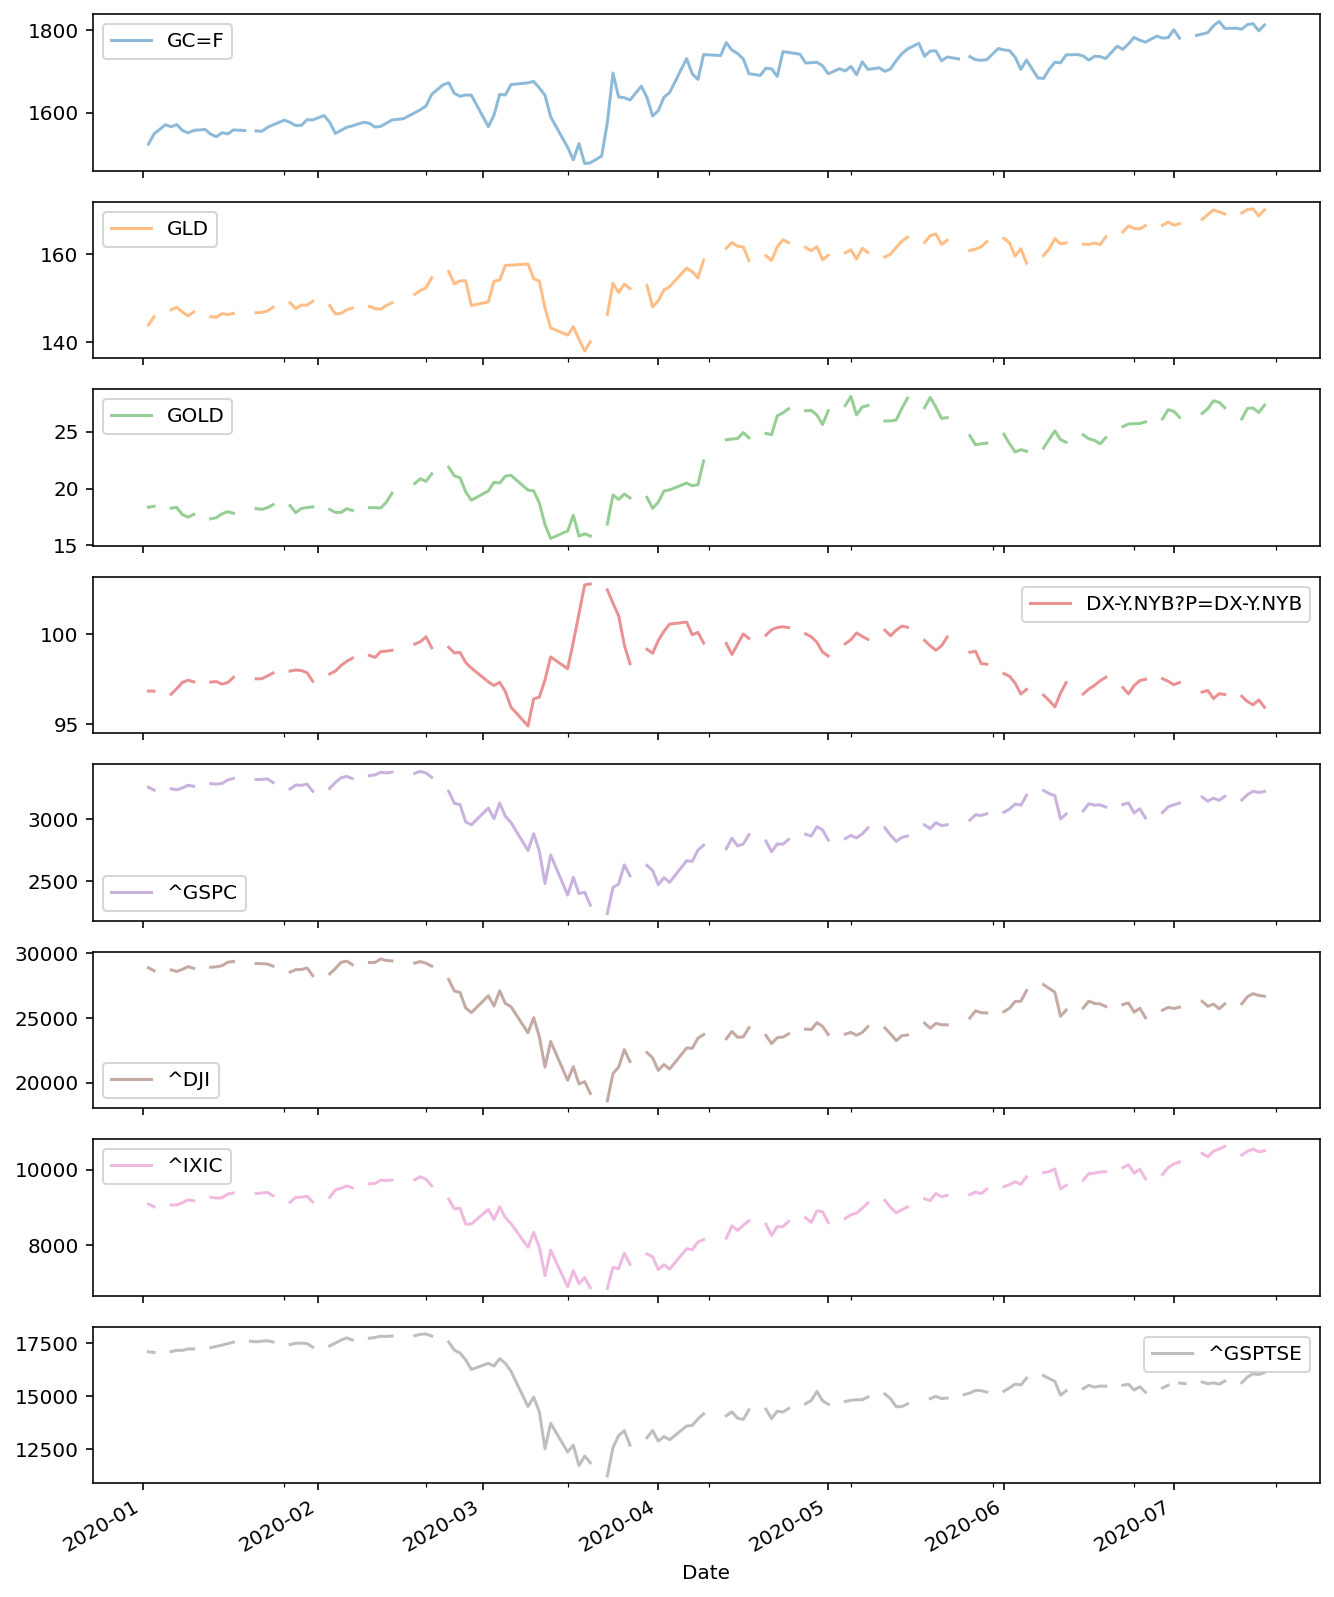

In [ ]:
# subplots starting from 2020
axes = all_close.loc['2020':].plot( alpha=0.5, 
                      figsize=(11, 15), subplots=True)

In [ ]:
all_close.loc['2020':].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 167 entries, 2020-01-02 to 2020-07-21
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   GC=F                 164 non-null    float64
 1   GLD                  139 non-null    float64
 2   GOLD                 139 non-null    float64
 3   DX-Y.NYB?P=DX-Y.NYB  139 non-null    float64
 4   ^GSPC                139 non-null    float64
 5   ^DJI                 139 non-null    float64
 6   ^IXIC                139 non-null    float64
 7   ^GSPTSE              140 non-null    float64
dtypes: float64(8)
memory usage: 11.7 KB


Text(0, 0.5, 'Close Price')

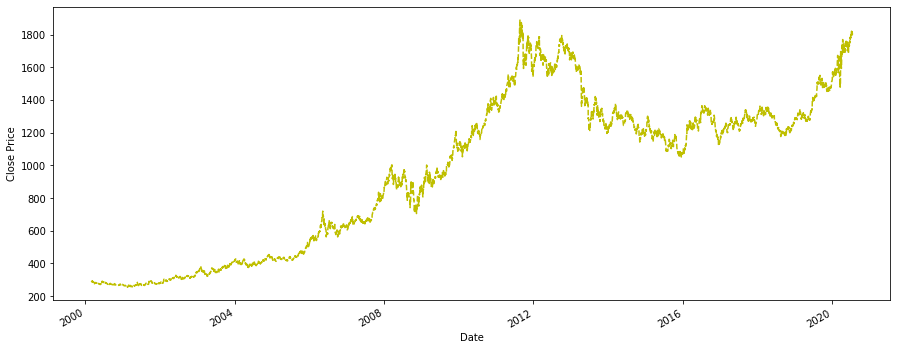

In [ ]:
# just gold futures
gcf.Close.plot(x='Date',y='Close Price',figsize=(15,6),linestyle='--', markerfacecolor='r',color='y',markersize=.0005)

plt.xlabel('Date')
plt.ylabel('Close Price')

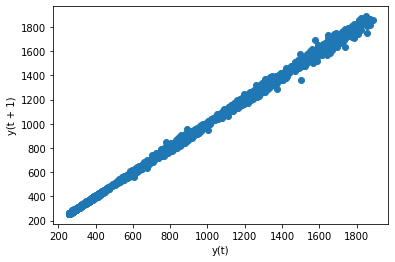

In [ ]:
# plotting lag for gold futures
pd.plotting.lag_plot(gcf.Close)

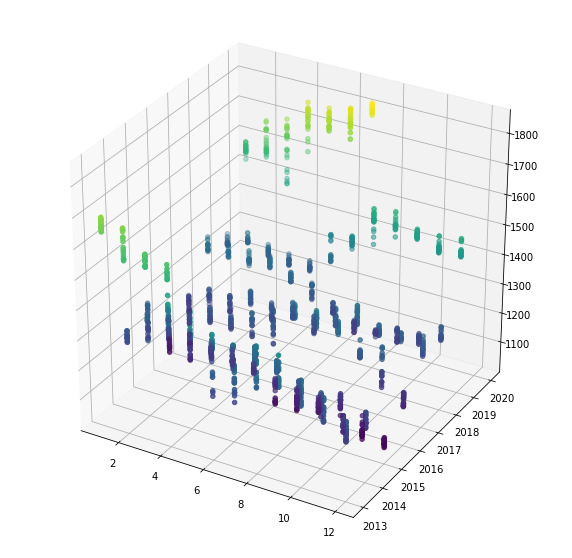

In [ ]:
# 3D plot
plt.rcParams["figure.figsize"] = (10,10)
data = gcf.loc['2013':]['Close']


ax = plt.axes(projection='3d')
df = data.reset_index()
df['Month_name']=df['Date'].dt.month
df['Year']=df['Date'].dt.year
# Data for three-dimensional scattered points
ydata = df['Year']
xdata = df['Month_name']
zdata = df['Close']
ax.scatter3D(xdata, ydata, zdata, c=zdata)

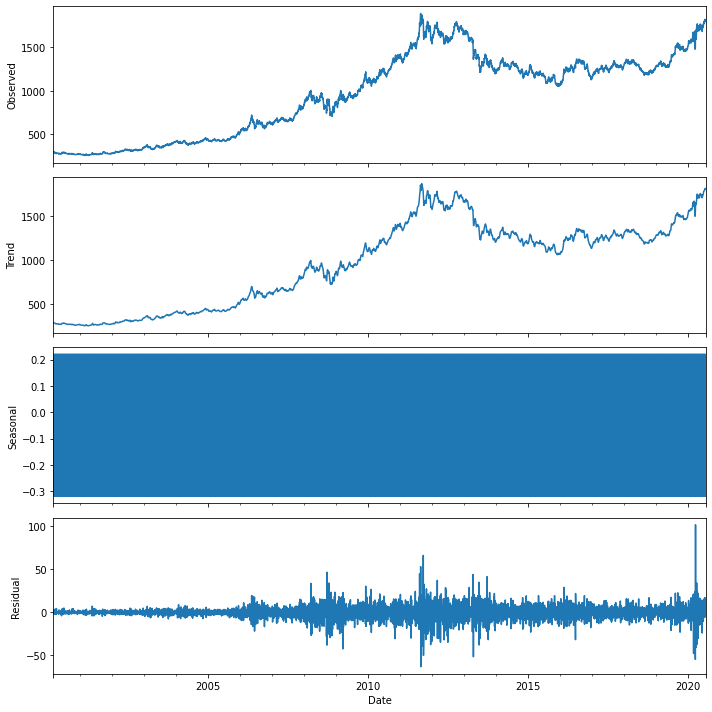

In [ ]:
#decompose components
decomposition = sm.tsa.seasonal_decompose(gcf.loc['2000':]['Close'].asfreq('d').interpolate(method='time'), model='additive')
fig = decomposition.plot()
plt.show()

In [ ]:
#imputing missing values
temp = data.asfreq('d')
temp.interpolate(method='time')

Date
2013-01-02    1687.900000
2013-01-03    1673.700000
2013-01-04    1648.100000
2013-01-05    1647.233333
2013-01-06    1646.366667
                 ...     
2020-07-13    1801.900000
2020-07-14    1812.900000
2020-07-15    1815.000000
2020-07-16    1797.800000
2020-07-17    1812.100000
Freq: D, Name: Close, Length: 2754, dtype: float64

In [ ]:
# adjusting for inflation in gold futures?

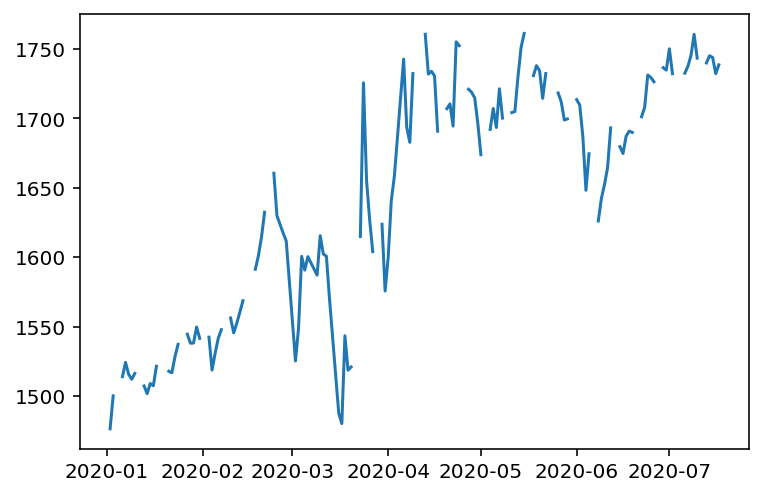

In [ ]:
adj_gcf = all_close[['GC=F', 'DX-Y.NYB?P=DX-Y.NYB']].loc['2020':]
adj_gcf['adj-gcf'] = adj_gcf['GC=F'] * adj_gcf['DX-Y.NYB?P=DX-Y.NYB']/100

plt.plot(adj_gcf['adj-gcf'])

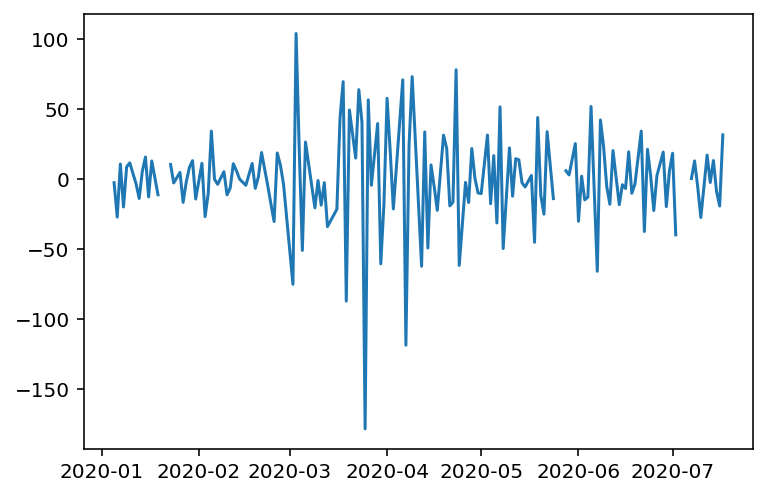

In [ ]:
plt.plot(adj_gcf['GC=F'].diff().diff())

In [ ]:
adj_gcf['DX-Y.NYB?P=DX-Y.NYB'].min()

71.33